
| <h1> Assignment 5.2 </h1> | <h1> Build and Apply Multilayer Perceptron  </h1> |
|--- | --- |
Name: Jimenez, Jerviz Mico A.<br>
Course and Section: CPE32S3 <br>
Date Submitted: 03/26/2024 <br>
Instructor: Engr. Roman Richard



In this assignment, you are task to build a multilayer perceptron model. The following are the requirements:

1. Choose any dataset <br>
2. Explain the problem you are trying to solve<br>
3. Create your own model<br>
4. Evaluate the accuracy of your model

<h2> 1. Choosing the dataset

The dataset used for this activity was acquired at https://archive.ics.uci.edu/dataset/379/website+phishing. This dataset includes features that shows if a website is a phishing website. There are 19 different features that is used to compare with the URL to determine if it is a fake.

Abdelhamid,Neda. (2016). Website Phishing. UCI Machine Learning Repository. https://doi.org/10.24432/C5B301.

<h2>2. Problem

This assignment has tasked us to build and apply Multilaayer Perceptron on our dataset. The model created would be used to predict if a URL is a phishing website or not. The accuracy of the model is then evaluated to determine if the model fits.

<h2> 3. Creating the model

In [8]:
# --- Importing Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# --- Loading the Data ---
data = pd.read_csv('PhishingData.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 1353 non-null   int64
 1   SFH                1353 non-null   int64
 2   popUpWidnow        1353 non-null   int64
 3   SSLfinal_State     1353 non-null   int64
 4   Request_URL        1353 non-null   int64
 5   URL_of_Anchor      1353 non-null   int64
 6   web_traffic        1353 non-null   int64
 7   URL_Length         1353 non-null   int64
 8   age_of_domain      1353 non-null   int64
 9   having_IP_Address  1353 non-null   int64
 10  Result             1353 non-null   int64
dtypes: int64(11)
memory usage: 116.4 KB


In [9]:
data.head(10)

,id,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,1,-1,1,-1,-1,1,1,1,0,0
1,2,-1,-1,-1,-1,-1,0,1,1,1,1
2,3,1,-1,0,0,-1,0,-1,1,0,1
3,4,1,0,1,-1,-1,0,1,1,0,0
4,5,-1,-1,1,-1,0,0,-1,1,0,1
5,6,-1,-1,1,-1,-1,1,0,-1,0,1
6,7,1,-1,0,1,-1,0,0,1,0,-1
7,8,1,0,1,1,0,0,0,1,1,-1
8,9,-1,-1,0,-1,-1,-1,-1,1,0,0
9,10,-1,0,-1,-1,1,1,0,-1,0,1


Observation:

The results show 3 different which are -1, 0 and 1. The dataset included URL that are fake(-1), Legitimate(1), and Unknown(0) meaning the URL have such features that makes it either legitimate or fake.

In [10]:
X = data[['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor', 'web_traffic', 'URL_Length',
          'age_of_domain', 'having_IP_Address']]

y = data['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
clf = MLPClassifier(hidden_layer_sizes=(9, 7), random_state=5, verbose=True, learning_rate_init=0.01)

clf.fit(X_train,y_train)

Iteration 1, loss = 0.98668412
Iteration 2, loss = 0.87110015
Iteration 3, loss = 0.76651652
Iteration 4, loss = 0.68946969
Iteration 5, loss = 0.62582113
Iteration 6, loss = 0.57298219
Iteration 7, loss = 0.53035188
Iteration 8, loss = 0.49566307
Iteration 9, loss = 0.47107904
Iteration 10, loss = 0.45412725
Iteration 11, loss = 0.44346742
Iteration 12, loss = 0.43567415
Iteration 13, loss = 0.42803444
Iteration 14, loss = 0.42098146
Iteration 15, loss = 0.41474247
Iteration 16, loss = 0.40891269
Iteration 17, loss = 0.40272601
Iteration 18, loss = 0.39713820
Iteration 19, loss = 0.39162139
Iteration 20, loss = 0.38557598
Iteration 21, loss = 0.37938986
Iteration 22, loss = 0.37462380
Iteration 23, loss = 0.36676262
Iteration 24, loss = 0.36094799
Iteration 25, loss = 0.35628559
Iteration 26, loss = 0.35135829
Iteration 27, loss = 0.34472937
Iteration 28, loss = 0.33992640
Iteration 29, loss = 0.33548629
Iteration 30, loss = 0.32957845
Iteration 31, loss = 0.32725410
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(9, 7), learning_rate_init=0.01,
              random_state=5, verbose=True)

[[182   5  16]
 [  2  29   4]
 [ 18   4 146]]


Text(0.5, 427.9555555555555, 'Predicted label')

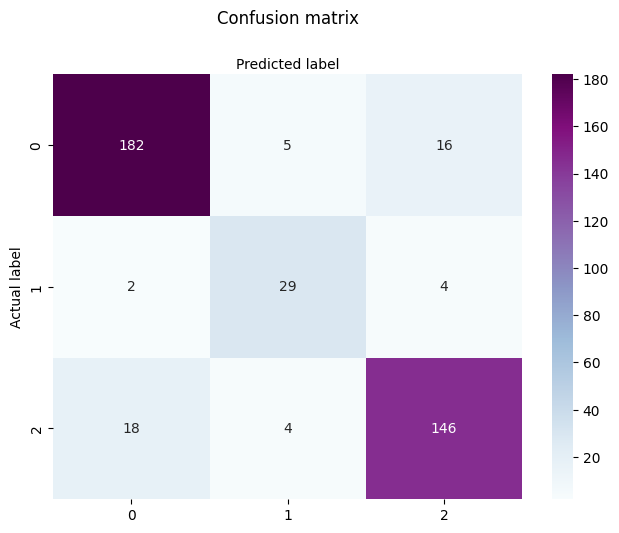

In [13]:
matrix = confusion_matrix(y_test, ypred)
print(matrix)
names=[-1,0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(names))
plt.xticks(tick_marks,names)
plt.yticks(tick_marks,names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [12]:
ypred = clf.predict(X_test)
accuracy_score(y_test, ypred)

0.8793103448275862